# Bonus Homework 1: Financial Data

## Preliminararies

### Imports

In [1]:
import os
from datetime import date

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import statsmodels.tsa.stattools
import statsmodels.graphics.tsaplots

%matplotlib inline

### Data Dir

In [2]:
data_dir="../../../data/finance" # my file is one root down

## CMT Treasury Rate Data

<div class="alert alert-block alert-info"> Problem 1.0 </div>
Load the data from the "H15.csv" file into a pandas dataframe.

You must have run the `FinanceDataSets` notebook first to generate that file.


In [3]:
H15 = pd.read_csv(data_dir + "/H15.csv")
H15.head()

,DATE,3M,6M,1Y,2Y,3Y,5Y,7Y,10Y,20Y,30Y
0,2006-02-09,4.52,4.67,4.66,4.66,4.62,4.55,4.55,4.54,4.72,4.51
1,2006-02-10,4.53,4.70,4.70,4.69,4.67,4.59,4.59,4.59,4.76,4.55
2,2006-02-13,4.55,4.71,4.70,4.68,4.66,4.58,4.58,4.58,4.76,4.56
3,2006-02-14,4.55,4.72,4.71,4.69,4.68,4.61,4.61,4.62,4.80,4.60
4,2006-02-15,4.55,4.70,4.70,4.71,4.68,4.60,4.60,4.61,4.78,4.58


<div class="alert alert-block alert-info">Problem 1.1</div>
Plot the history of the 2 year and 5 year CMT rates 
(the `plot()` function of the `pd.DataFrame` object may be useful)

Text(0, 0.5, 'Rate')

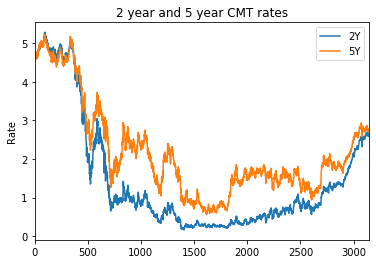

In [4]:
H15[['2Y','5Y']].plot()
plt.title('2 year and 5 year CMT rates')
plt.ylabel('Rate')

<div class="alert alert-block alert-info">Problem 1.2</div>

Do the 5T CMT rates  at two  consecutive dates  look independent of each other?

In [5]:
# Their trends look really similar to each other, especially at the starting point and the end point. Therefore, it is hard to conclude that they are independent of each other 

### Auto Correlation of Rate Levels

For two time series of length $N$, the **auto correlation** function is defined by ([see](https://www.mathworks.com/help/econ/autocorrelation-and-partial-autocorrelation.html),
or [wikipedia](https://en.wikipedia.org/wiki/Autocorrelation)
is defined as

$$
    \rho_\tau(X,Y) = \frac{C_\tau(X,Y)}{C_0(X,Y)}
$$
where the shifted covariance $C_\tau(X,Y)$ is defined by
$$
    C_\tau(X,Y)= \sum_{t=0}^{N-\tau} (X_{t}-\mu_X)(Y_{t+\tau}-\mu_Y)
$$
and where $\mu_X$ and $\mu_Y$ are the sample means
\begin{align}
    \mu_X &=\frac{1}{N} \sum_{t=1}^N X_t \\
    \mu_Y &=\frac{1}{N} \sum_{t=1}^N Y_t \\
\end{align} 

Other definitions that differ by factors of order $\frac{1}{N-k}$ are used sometimes, but give similar results provided $N \gg k$. 

<div class="alert alert-block alert-info">Problem 1.3</div>
Compute the auto correlation of the 5Y CMT rate with itself for lags $\tau=0,1,\dots,5$.

What would you expect those correlations to be if rates for different times were independent from each other?

In [6]:
# Compute the auto correlation of the 5Y CMY rate
def auto_correlation(X,Y,r):
    if r == 0:
        return 1
    CX = X - X.mean()
    CY = Y - Y.mean()
    C0 = np.sum(CX*CY)  
    Cr = np.sum(CX[:-r]*CY[r:])
    return Cr/C0

Y5_CMT = H15['5Y'].values

R = np.empty(6) # creating an array
for r in range(0,6):
    R[r] = auto_correlation(Y5_CMT,Y5_CMT,r)
R

array([1.        , 0.99817712, 0.99642824, 0.99483342, 0.9931474 ,
       0.99148257])

<div class="alert alert-block alert-info">Problem 1.4</div>
Compare your results to the auto correlations computed by the function [`statsmodels.tsa.stattools.acf`](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.acf.html)

In [7]:
ac_f = statsmodels.tsa.stattools.acf(Y5_CMT)[:6]
print(ac_f)
print(R)
print(ac_f - R)

[1.         0.99817712 0.99642824 0.99483342 0.9931474  0.99148257]
[1.         0.99817712 0.99642824 0.99483342 0.9931474  0.99148257]
[0.00000000e+00 3.33066907e-16 2.22044605e-16 2.22044605e-16
 1.11022302e-16 1.11022302e-16]


/Users/zhouzihui/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


<div class="alert alert-block alert-info">Problem 1.5</div>

Use function [`statsmodels.graphics.tsaplots.plot_acf`](https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html)
to plot the auto correlation for the 50 first $\tau$ lags (use the argument `lags` to that function )

The light blue shaded area in the graph is the confidence interval for the empirical auto-correlation assuming $X$ and $ Y$ times series
are uncorrelated at lag $\tau$.

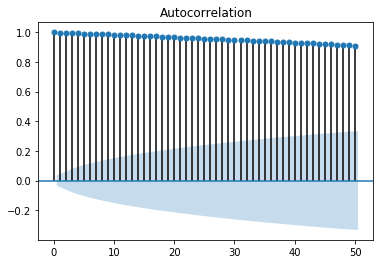

In [8]:
plt = statsmodels.graphics.tsaplots.plot_acf(Y5_CMT, lags = 50)

<div class="alert alert-block alert-info">Problem 1.6</div>
It the auto correlation function significantly difference from zero up to lag 50?


In [9]:
# From the graph (blue shaded area), we can notice that the auto correlation function is significantly different from zero up to lag 50

### Time series of the daily changes of the CMT 5Y rate

<div class="alert alert-block alert-info">Problem 1.7</div>
create a series  for the 1-lag difference of CMT rates (daily change of the rate)
$$
    \Delta_1 Y_t = Y_{t+1}-Y_{t}
$$

In [10]:
diff = Y5_CMT[1:] - Y5_CMT[:-1]
diff

array([ 0.04, -0.01,  0.03, ..., -0.01,  0.04, -0.01])

<div class="alert alert-block alert-info">Problem 1.8</div>
Compute the auto correlation of the daily changes of the 5Y CMT Rate
$$
    \rho_\tau(\Delta_1 Y_t,\Delta_1 Y_t)
$$
for lags $\tau=0,1,\cdots 5$.


In [11]:
D = np.empty(6) # creating an array
for lag in range(0,6):
    D[lag] = auto_correlation(diff,diff,r)
D

array([-0.03012158, -0.03012158, -0.03012158, -0.03012158, -0.03012158,
       -0.03012158])

<div class="alert alert-block alert-info">Problem 1.9</div>
use `statsmodels.graphics.tsaplots.plot_acf` to visual investigate if the 50 first lag correlations are significantly different from zero.


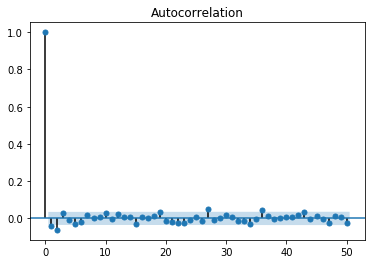

In [12]:
visualization = statsmodels.graphics.tsaplots.plot_acf(diff, lags = 50)

In [13]:
# Observing the graph, we can conclude that the 50 first lag correlations are NOT significantly different from zero.

## Equity Market Indexes

<div class="alert alert-block alert-info"> Problem 2.0 </div>
Load the data "RussellIndexes.csv" file into a pandas dataframe.

In [29]:
RI = pd.read_csv(data_dir + '/RussellIndexes.csv')
RI

,DATE,RU3000,RU2000,RU1000V,RU1000,RU2000V,RU1000G,RUMIDCAP,RU2000G,RU3000V,RMIDGR,RMIDVL,RU3000G
0,1995-05-31,1032.69,982.04,192.75,1036.37,1203.23,181.34,1242.92,1190.50,1000.00,338.75,328.35,1000.00
1,1995-06-01,1034.42,986.60,193.05,1037.77,1209.42,181.55,1246.34,1195.46,1001.91,339.98,329.00,1001.45
2,1995-06-02,1034.56,989.48,192.99,1037.61,1212.55,181.54,1247.38,1199.32,1001.90,340.23,329.30,1001.72
3,1995-06-05,1041.21,996.50,194.27,1044.21,1219.08,182.66,1259.02,1209.81,1008.40,343.85,331.99,1008.11
4,1995-06-06,1041.04,998.22,194.20,1043.82,1221.69,182.59,1258.83,1211.42,1008.28,343.47,332.23,1007.89
5,1995-06-07,1037.21,998.79,192.91,1039.50,1220.05,182.26,1255.82,1214.33,1002.09,343.79,330.45,1006.52
6,1995-06-08,1036.18,1002.14,192.04,1037.98,1222.09,182.51,1256.08,1220.34,998.21,345.03,329.51,1008.25
7,1995-06-09,1028.41,1000.26,190.39,1029.57,1218.23,181.12,1245.55,1219.56,990.17,342.72,326.25,1001.21
8,1995-06-12,1033.96,1004.80,191.37,1035.22,1222.15,182.17,1250.62,1226.63,995.05,344.09,327.60,1007.04
9,1995-06-13,1043.93,1011.47,193.35,1045.54,1227.31,183.92,1262.20,1237.58,1004.76,347.33,330.59,1016.64


<div class="alert alert-block alert-info">Problem 2.1</div>
Plot the history of the RU3000 and RUMIDCAP equity indexes 
(the `plot()` function of the `pd.DataFrame` object by be useful)

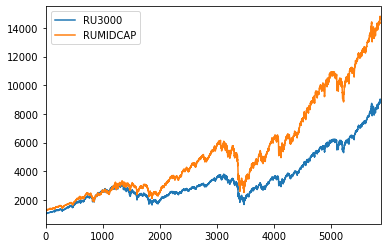

In [30]:
RI[['RU3000','RUMIDCAP']].plot()

<div class="alert alert-block alert-info">Problem 2.2</div>
Plot the history of the log of RU3000 and RUMIDCAP equity indexes 
(the `plot()` function of the `pd.DataFrame` object by be useful)

In [34]:
log_RI=np.log(RI)
log_RI[['RU3000','RUMIDCAP']].plot()

AttributeError: 'str' object has no attribute 'log'

<div class="alert alert-block alert-info">Problem 2.3</div>
use `statsmodels.graphics.tsaplots.plot_acf` to visual investigate if the 50 first lag correlations  of the log of RU3000  are significantly different from zero.


In [ ]:
RU = RI['RU3000'].values
vs = statsmodels.graphics.tsaplots.plot_acf(RU, lags = 50)

<div class="alert alert-block alert-info">Problem 2.4</div>
create a series for the 1-lag difference of the Russell 3000 Log levels
(the daily log returns of Rusell 3000).

Use `statsmodels.graphics.tsaplots.plot_acf` to investigate if there are significant auto correlations
for the first 50 lags of the daily log returns for Rusell 3000.

In [ ]:
diff = RU[1:] - RU[:-1]
diff_vs = statsmodels.graphics.tsaplots.plot_acf(diff, lags = 50)